In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Dataset\Testing\glioma_tumor\image(1).jpg
Dataset\Testing\glioma_tumor\image(10).jpg
Dataset\Testing\glioma_tumor\image(100).jpg
Dataset\Testing\glioma_tumor\image(11).jpg
Dataset\Testing\glioma_tumor\image(12).jpg
Dataset\Testing\glioma_tumor\image(13).jpg
Dataset\Testing\glioma_tumor\image(14).jpg
Dataset\Testing\glioma_tumor\image(15).jpg
Dataset\Testing\glioma_tumor\image(16).jpg
Dataset\Testing\glioma_tumor\image(17).jpg
Dataset\Testing\glioma_tumor\image(18).jpg
Dataset\Testing\glioma_tumor\image(19).jpg
Dataset\Testing\glioma_tumor\image(2).jpg
Dataset\Testing\glioma_tumor\image(20).jpg
Dataset\Testing\glioma_tumor\image(21).jpg
Dataset\Testing\glioma_tumor\image(22).jpg
Dataset\Testing\glioma_tumor\image(23).jpg
Dataset\Testing\glioma_tumor\image(24).jpg
Dataset\Testing\glioma_tumor\image(25).jpg
Dataset\Testing\glioma_tumor\image(26).jpg
Dataset\Testing\glioma_tumor\image(27).jpg
Dataset\Testing\glioma_tumor\image(28).jpg
Dataset\Testing\glioma_tumor\image(29).jpg
Dataset\Test

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

Here we import all the required libraries needed for the project

In [4]:
pip install ipywidgets

   ---------------------------------------- 0.0/139.4 kB ? eta -:--:--
   -- ------------------------------------- 10.2/139.4 kB ? eta -:--:--
   ----------- --------------------------- 41.0/139.4 kB 393.8 kB/s eta 0:00:01
   --------------------------------- ---- 122.9/139.4 kB 901.1 kB/s eta 0:00:01
   -------------------------------------- 139.4/139.4 kB 922.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/215.0 kB ? eta -:--:--
   ------- -------------------------------- 41.0/215.0 kB ? eta -:--:--
   ------------- -------------------------- 71.7/215.0 kB 1.3 MB/s eta 0:00:01
   ---------------------- ----------------- 122.9/215.0 kB 1.2 MB/s eta 0:00:01
   ------------------------------------ --- 194.6/215.0 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 215.0/215.0 kB 1.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
    --------------------------------------- 0.0/2.3 MB 1.9 MB/s eta 0:00:02
   - -----

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\Python312\\etc'
Consider using the `--user` option or check the permissions.



In [11]:
pip install tqdm

ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'c:\\Python312\\Scripts\\tqdm.exe' -> 'c:\\Python312\\Scripts\\tqdm.exe.deleteme'




  Using cached tqdm-4.66.2-py3-none-any.whl.metadata (57 kB)
Using cached tqdm-4.66.2-py3-none-any.whl (78 kB)


In [13]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('Dataset/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('Dataset/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

Here we pass the images in the dataset to the parameters and we read the image and resize the image using the OpenCV library 

In [14]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [16]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [17]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

C:\Users\Atheek\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 69, 69, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [20]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)


Epoch 1/20
76/83 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.3021 - loss: 2.9345

KeyboardInterrupt: 

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

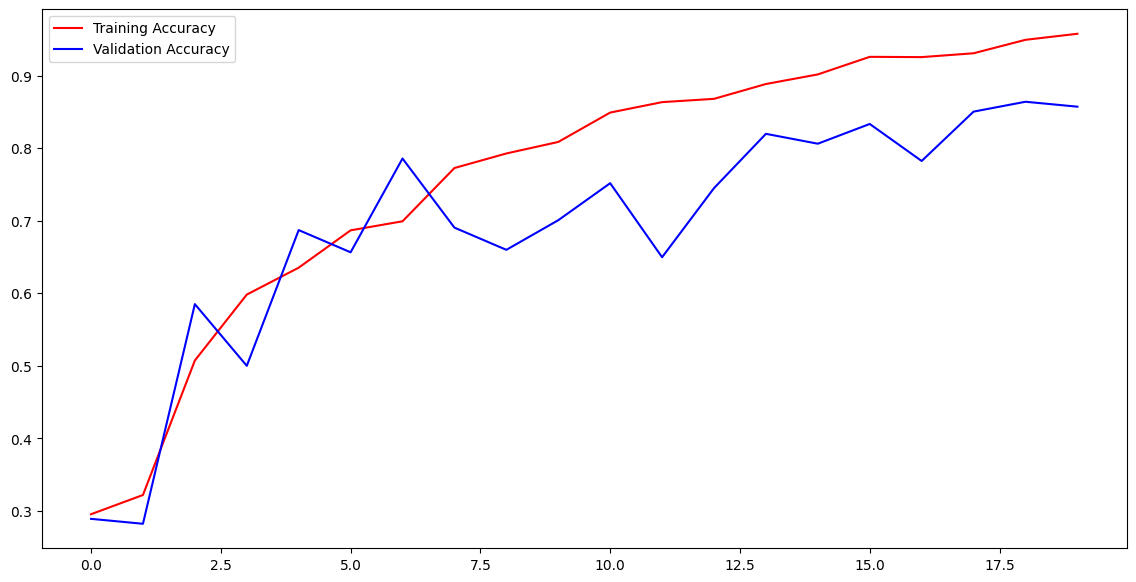

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

In the above graph we plot the graph for the Training Accuracy and the  Validation Accuracy 

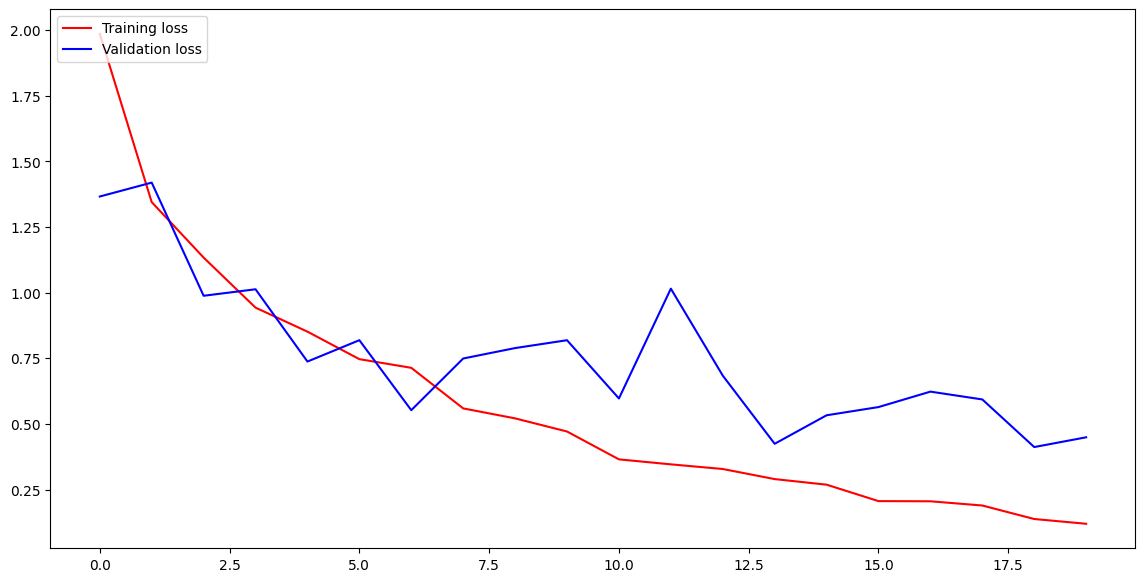

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In the above graph we plot the graph for Training loss and Validation loss

In [16]:
img = cv2.imread('../input/brain-tumor-classification-mri/Training/pituitary_tumor/p (107).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [17]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape


(1, 150, 150, 3)

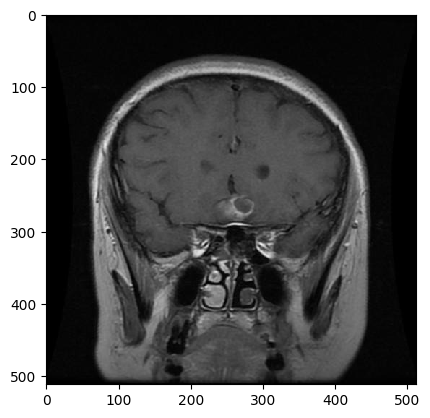

In [18]:
from tensorflow.keras.preprocessing import image
img = image.load_img('../input/brain-tumor-classification-mri/Training/pituitary_tumor/p (107).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [19]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


3

In [5]:
pip install flask tensorflow keras


Note: you may need to restart the kernel to use updated packages.


In [1]:
from flask import Flask, render_template, request
import numpy as np
import cv2
import tensorflow as tf
import tensorflow.keras as keras


app = Flask(__name__)

# Load your classification model
model = keras.models.load_model('braintumor.h5')

# Define the target image size
target_size = (150, 150)

# Define the mapping of indices to tumor types
tumor_types = {
    0: "Glioma tumor",
    1: "Meningioma tumor",
    2: "No tumor",
    3: "Pituitary tumor"
}

# Function to preprocess input image
def preprocess_image(image_file, target_size):
    nparr = np.fromstring(image_file.read(), np.uint8)
    img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)  # Convert bytes to image
    img = cv2.resize(img, target_size)  # Resize image
    img_array = np.array(img)  # Convert image to numpy array
    img_array = img_array.reshape(1, target_size[0], target_size[1], 3)  # Reshape array
    return img_array

# Function to make predictions on input image
def predict_image(image, model):
    preprocessed_image = preprocess_image(image, target_size)
    prediction = model.predict(preprocessed_image)
    return prediction[0]

@app.route("/", methods=["GET", "POST"])
def index():
    if request.method == "POST":
        # Check if file is uploaded
        if "file" not in request.files:
            return render_template("index.html", message="No file uploaded")
        
        file = request.files["file"]
        
        # Check if file is uploaded and has an allowed extension
        if file.filename == "":
            return render_template("index.html", message="No file selected")
        
        # Make prediction
        predictions = predict_image(file, model)

        # Get the predicted class index
        predicted_class_index = np.argmax(predictions)

        # Get the tumor type corresponding to the predicted index
        tumor_type = tumor_types.get(predicted_class_index, "Unknown")

        return render_template("results.html", message="Predicted tumor type: " + tumor_type)

    return render_template("index.html", message=None)

if __name__ == "__main__":
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [10/Apr/2024 12:45:57] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [10/Apr/2024 12:45:58] "GET /favicon.ico HTTP/1.1" 404 -
C:\Users\Atheek\AppData\Local\Temp\ipykernel_17648\957527712.py:26: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  nparr = np.fromstring(image_file.read(), np.uint8)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


INFO:werkzeug:127.0.0.1 - - [10/Apr/2024 12:46:14] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [10/Apr/2024 12:46:44] "GET / HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


INFO:werkzeug:127.0.0.1 - - [10/Apr/2024 12:46:50] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [10/Apr/2024 12:46:55] "GET / HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


INFO:werkzeug:127.0.0.1 - - [10/Apr/2024 12:47:26] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [10/Apr/2024 12:47:29] "GET / HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


INFO:werkzeug:127.0.0.1 - - [10/Apr/2024 12:47:37] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [10/Apr/2024 12:47:38] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [10/Apr/2024 12:48:12] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [10/Apr/2024 12:48:14] "GET /favicon.ico HTTP/1.1" 404 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


INFO:werkzeug:127.0.0.1 - - [10/Apr/2024 12:48:20] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [10/Apr/2024 12:48:37] "GET / HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


INFO:werkzeug:127.0.0.1 - - [10/Apr/2024 12:48:46] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [10/Apr/2024 12:48:47] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [10/Apr/2024 12:49:21] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [10/Apr/2024 12:49:21] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [10/Apr/2024 12:49:21] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [10/Apr/2024 12:49:21] "GET / HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


INFO:werkzeug:127.0.0.1 - - [10/Apr/2024 12:49:27] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [10/Apr/2024 12:49:28] "GET / HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


INFO:werkzeug:127.0.0.1 - - [10/Apr/2024 12:49:36] "POST / HTTP/1.1" 200 -


In [11]:
%tb

SystemExit: 1